In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

xdata=pd.to_numeric(range(data.shape[0]))
real_data = data['data']


ydata_positivi = data['nuovi_positivi']
ydata_tamponi  = data['tamponi']

tamponi_giornalieri = np.empty(len(ydata_tamponi))
for i in range(len(ydata_tamponi)):
    if i >= 1:
        tamponi_giornalieri[i] = ydata_tamponi[i] - ydata_tamponi[i-1]
tamponi_giornalieri[0] = ydata_tamponi[0]
percentuale = ydata_positivi / tamponi_giornalieri


print(ydata_positivi)
print(tamponi_giornalieri)
print(real_data)

0      221
1       93
2       78
3      250
4      238
5      240
6      566
7      342
8      466
9      587
10     769
11     778
12    1247
13    1492
14    1797
15     977
16    2313
17    2651
18    2547
19    3497
20    3590
21    3233
22    3526
23    4207
24    5322
25    5986
26    6557
27    5560
28    4789
29    5249
30    5210
31    6153
32    5959
33    5974
34    5217
35    4050
36    4053
37    4782
38    4668
39    4585
40    4805
41    4316
42    3599
43    3039
44    3836
45    4204
46    3951
47    4694
48    4092
49    3153
50    2972
51    2667
52    3786
53    3493
54    3491
Name: nuovi_positivi, dtype: int64
[ 4324.  4299.   964.  2427.  3681.  2966.  2466.  2218.  2511.  3981.
  2525.  3997.  5703.  7875.  3889.  6935. 12393. 12857. 11477. 11682.
 15729. 13063. 10695. 16884. 17236. 24109. 26336. 25180. 17066. 21496.
 27481. 36615. 33019. 35447. 24504. 23329. 29609. 34455. 39809. 38617.
 37375. 34237. 30271. 33713. 51680. 46244. 53495. 56609. 46720. 36717.
 2677

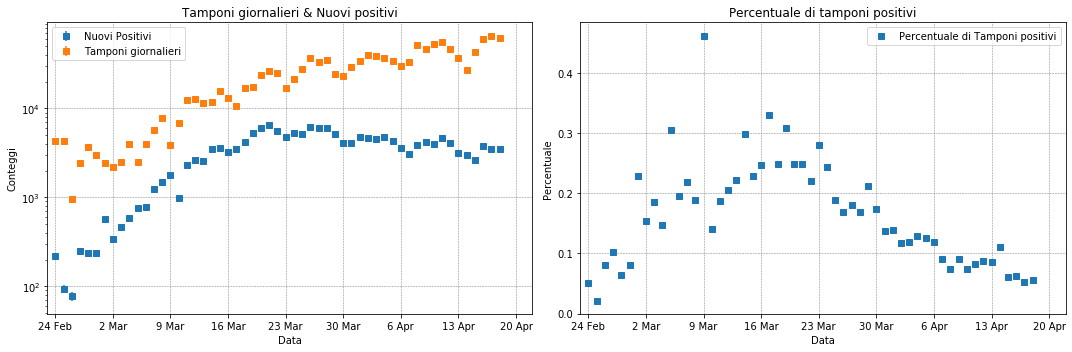

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.errorbar(xdata,ydata_positivi,np.sqrt(ydata_positivi),linestyle='None',label='Nuovi Positivi',marker='s')
plt.errorbar(xdata,tamponi_giornalieri,np.sqrt(tamponi_giornalieri),linestyle='None',label='Tamponi giornalieri',marker='s')
plt.xticks(np.arange(0,80,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'])
plt.xlim(-1,58)
plt.xlabel('Data')
plt.ylabel('Conteggi')
plt.title('Tamponi giornalieri & Nuovi positivi')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(xdata,percentuale,linestyle='None',label='Percentuale di Tamponi positivi',marker='s')
plt.xticks(np.arange(0,80,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr'])
plt.xlim(-1,58)
plt.xlabel('Data')
plt.ylabel('Percentuale')
plt.title('Percentuale di tamponi positivi')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()


plt.savefig('output/Tamponi_Positivi.png',dpi=300)
plt.show()